# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/harajlim/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


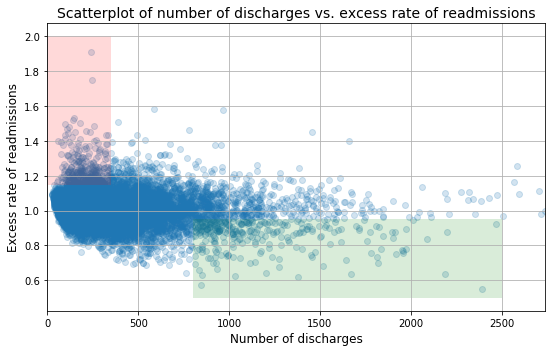

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [17]:
# Your turn
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


# We begin by examining truthfulness of the the statements under points A and B:

**A. Overall, rate of readmissions is trending down with increasing number of discharges:**

The statement is not really apparent from scatterplot. A more rigorous analysis is needed.

To do so we begin by fitting a line to the data. We also build a 99% confidence interval for the slope of the line using bootstrapping.

In [40]:
slope, intercept=np.polyfit(x,y,deg=1)

print('The line fitting the data has a slope of: '+
     str(slope)+' and an intercept of: '+
     str(intercept))



The line fitting the data has a slope of: -2.8565052943822905e-05 and an intercept of: 1.0179475579544215


The slope indicates that every additional 1000 discahrges, the readmission rate decreases by -slope*1000= 0.0285
which is around 3% of the expected number of readmissions.

99% confidence interval for slope is: [-3.69461152e-05 -2.03740765e-05]


/home/harajlim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'pdf')

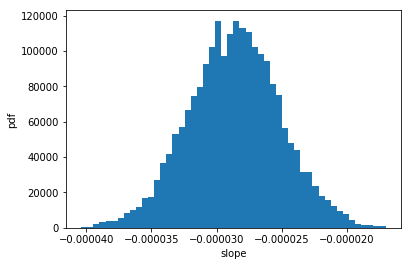

In [43]:
#to get a confidence interval for the slope:

bs_size=10000
slope=np.empty(bs_size)
index=np.arange(0,len(x))
x=np.array(x)
y=np.array(y)

for i in range(10000):
    
    chosen_index=np.random.choice(index,size=len(index))
    a,b=np.polyfit(x[chosen_index],y[chosen_index],deg=1)
    slope[i]=a

print('99% confidence interval for slope is: '+
      str(np.percentile(slope,[1,99])))
plt.hist(slope,bins=50,normed=True)
plt.xlabel('slope')
plt.ylabel('pdf')

With the above, we are 99% certain that the slope of the line fitting the data (line fitted using least squares error), is negative. So we agree with the statement. No information about the magnitude of the slope is discussed here (i.e. no practical significace is discussed).

**A.With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)**

This statemetn is a bit tougher to tackle. Graphically we can agree that there does seem to be a higher incidence of relatively higher readmission rates for hospitals with smaller discharges. We need to quantify what excess rate means. Graphically, it seems that a high readmissions rate is considered as > 1.15.

In what follows we look at L(HighReadmissionsRate|DischargeNumber). (L is the likelihood operator)


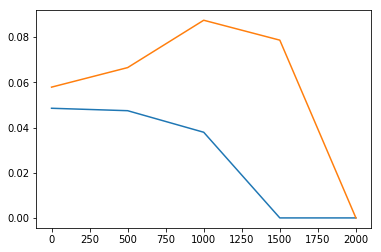

In [140]:
cutoff=1.15

step=500
discharges=np.arange(0,2500,step=step)
prob_L=np.zeros(len(discharges))
prob_U=np.zeros(len(discharges))

for i,d in enumerate(discharges):

    y_keep=[]
    for j,xx in enumerate(x):
        if xx>=d and xx<d+step:

            y_keep.append(y[j])
    

    y_keep=np.array(y_keep)
    
    replicates=np.empty(10000)
    for j in range(10000):
        y_bs=np.random.choice(y_keep,size=len(y_keep))
        replicates[j]=np.sum(y_bs>=cutoff)/len(y_bs)
    
    L,U=np.percentile(replicates,[2.5,97.5])
    prob_L[i]=L
    prob_U[i]=U
    
plt.plot(discharges,prob_L)
plt.plot(discharges,prob_U)
#plt.scatter(x,y)

The above shows that there is a tendency to have larger readmission rates nearer to hospital with discharge sizes of zero.

**A.With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

Graphically we can agree that there does seem to be a higher incidence of relatively lower readmission rates for hospitals with larger discharges. We need to quantify what lower rates mean. Graphically, it seems that a low readmissions rate is considered as 0.95.

In what follows we look at L(LowReadmissionsRate|DischargeNumber).


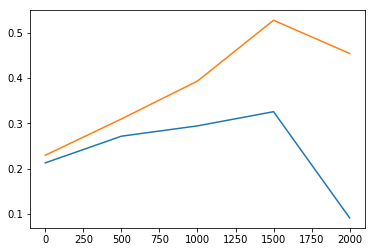

In [141]:
cutoff=0.95

step=500
discharges=np.arange(0,2500,step=step)
prob_L=np.zeros(len(discharges))
prob_U=np.zeros(len(discharges))

for i,d in enumerate(discharges):

    y_keep=[]
    for j,xx in enumerate(x):
        if xx>=d and xx<d+step:

            y_keep.append(y[j])
    

    y_keep=np.array(y_keep)
    
    replicates=np.empty(10000)
    for j in range(10000):
        y_bs=np.random.choice(y_keep,size=len(y_keep))
        replicates[j]=np.sum(y_bs<=cutoff)/len(y_bs)
    
    L,U=np.percentile(replicates,[2.5,97.5])
    prob_L[i]=L
    prob_U[i]=U

  
        
plt.plot(discharges,prob_L)
plt.plot(discharges,prob_U)
#plt.scatter(x,y)